# Tutorial to use visualisation tools

- use scona visualisation tools to make pretty plots of brain analysis.

This tutorial will go through **the main visualisation functionality** of scona, beginning from producing required inputs to create different figures.

*Note*: Before running this tutorial, please refer to scona/tutorials/introductory_tutorial.ipynb for an introduction about  basic functionality of scona and structural covariance network analysis in general.

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# threshold G at cost 10 to create a binary graph with 10% as many edges as the complete graph G.
H = G.threshold(10)

------------------------------------------------------------------

## *plot_rich_club*
- to plot the rich club values per degree along with the random rich club values created from Random Networks with a preserved degree distribution

Function requries *GraphBundle* object - scona way to handle across-network comparisons. Basically, it is a dictionary, containing *BrainNetwork* objects as values and *strings* (corresponding names of BrainNetwork) as keys.

In [2]:
bundleGraphs = scn.GraphBundle([H], ["Real_Graph"])

This creates a dictionary-like object with BrainNetwork H keyed by 'Real_Graph'

In [3]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7fae126100f0>}

Now add a series of random graphs created by edge swap randomisation of H (keyed by 'Real_Graph').

The *create_random_graphs method* of the GraphBundle class takes in a real network (in our case G10) and creates a number (10 in the example below) of random graphs. The output is a dictionary of all these graphs.

In [4]:
# Note that 10 is not usually a sufficient number of random graphs to do meaningful analysis,
# it is used here for time considerations
bundleGraphs.create_random_graphs("Real_Graph", 10)

        Creating 10 random graphs - may take a little while


In [5]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7fae126100f0>,
 'Real_Graph_R0': <scona.classes.BrainNetwork at 0x7fae40519400>,
 'Real_Graph_R1': <scona.classes.BrainNetwork at 0x7fae40587c88>,
 'Real_Graph_R2': <scona.classes.BrainNetwork at 0x7fae40587470>,
 'Real_Graph_R3': <scona.classes.BrainNetwork at 0x7fae405874a8>,
 'Real_Graph_R4': <scona.classes.BrainNetwork at 0x7fae40519860>,
 'Real_Graph_R5': <scona.classes.BrainNetwork at 0x7fae40519b38>,
 'Real_Graph_R6': <scona.classes.BrainNetwork at 0x7fae40519898>,
 'Real_Graph_R7': <scona.classes.BrainNetwork at 0x7fae40519dd8>,
 'Real_Graph_R8': <scona.classes.BrainNetwork at 0x7fae40519da0>,
 'Real_Graph_R9': <scona.classes.BrainNetwork at 0x7fae40519fd0>}

Well-done! The required input - GraphBundle is created. Now, let's plot the **rich club coefficient values** of our BrainNetwork Graph and compare real values to random rich club values obtained from 10 random Graphs (stored inside the GraphBundle).   

In [6]:
# import the function to plot rich club values
from scona.visualisations import plot_rich_club

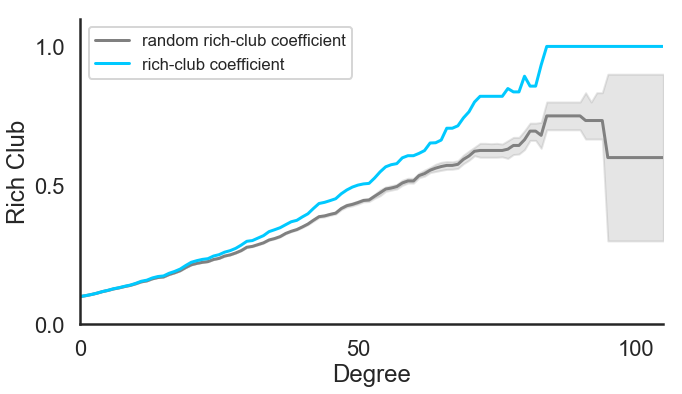

In [7]:
# plot the figure and display without saving to a file
plot_rich_club(bundleGraphs)

In [8]:
# show rich club values for degrees from 55 to 65
rich_club_df = bundleGraphs.report_rich_club()
rich_club_df.iloc[55:66, :]

,Real_Graph,Real_Graph_R0,Real_Graph_R1,Real_Graph_R2,Real_Graph_R3,Real_Graph_R4,Real_Graph_R5,Real_Graph_R6,Real_Graph_R7,Real_Graph_R8,Real_Graph_R9
55,0.566783,0.473868,0.483159,0.471545,0.501742,0.469222,0.509872,0.502904,0.492451,0.485482,0.476190
56,0.574390,0.474390,0.486585,0.479268,0.506098,0.473171,0.513415,0.506098,0.495122,0.485366,0.482927
57,0.578205,0.479487,0.496154,0.482051,0.514103,0.479487,0.516667,0.515385,0.494872,0.489744,0.487179
58,0.599099,0.493994,0.510511,0.492492,0.516517,0.495495,0.534535,0.536036,0.507508,0.493994,0.504505
59,0.606723,0.500840,0.515966,0.510924,0.514286,0.495798,0.532773,0.546218,0.517647,0.510924,0.512605
60,0.606723,0.500840,0.515966,0.510924,0.514286,0.495798,0.532773,0.546218,0.517647,0.510924,0.512605
61,0.615054,0.529032,0.529032,0.524731,0.537634,0.516129,0.544086,0.563441,0.526882,0.531183,0.548387
62,0.625287,0.544828,0.528736,0.533333,0.542529,0.528736,0.558621,0.586207,0.524138,0.533333,0.542529
63,0.652422,0.555556,0.547009,0.552707,0.555556,0.544160,0.566952,0.589744,0.532764,0.541311,0.558405
64,0.653333,0.560000,0.546667,0.560000,0.560000,0.563333,0.576667,0.613333,0.526667,0.550000,0.563333


More examples of plotting rich club values:

- save the produced figure in the current directory (where this running python file (or notebook) is located) and set different colors (for real values - #FF4400 - red, for random - #00BBFF - blue).

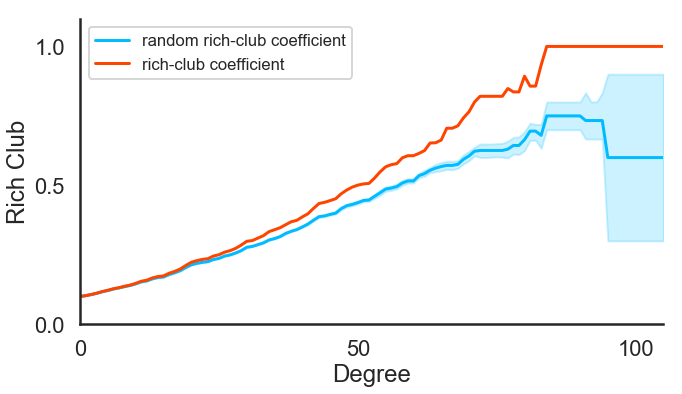

In [9]:
plot_rich_club(bundleGraphs, figure_name="Rich_club_values", color=["#FF4400", "#00BBFF"])

- save the produced figure in the location = figure_name and without the legend.

Please, give your own location (path-to_file) to *figure_name* in order to save a figure.

*Note*: if location does not exist, we will notify you and try to automatically create necessary directories.

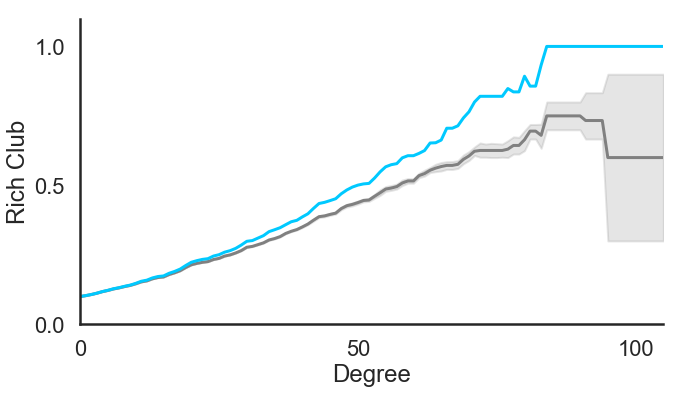

/home/pilot/anaconda3/lib/python3.6/site-packages/scona/helpers.py:22: UserWarning: The path - /home/pilot/GSoC/mynewdir/Rich_Club_Values does not exist. But we will create this directory for you and store the figure there.
  "directory for you and store the figure there.".format(path_name))


In [10]:
plot_rich_club(bundleGraphs, figure_name="/home/pilot/GSoC/mynewdir/Rich_Club_Values", show_legend=False)

* plot rich club values **only for the real network** (BrainNetwork Graph) and set the color to green.

Simply, do not create random graphs in GraphBundle

In [11]:
realGraph = scn.GraphBundle([H], ["Real_Graph"])

In [12]:
realGraph

{'Real_Graph': <scona.classes.BrainNetwork at 0x7fae126100f0>}

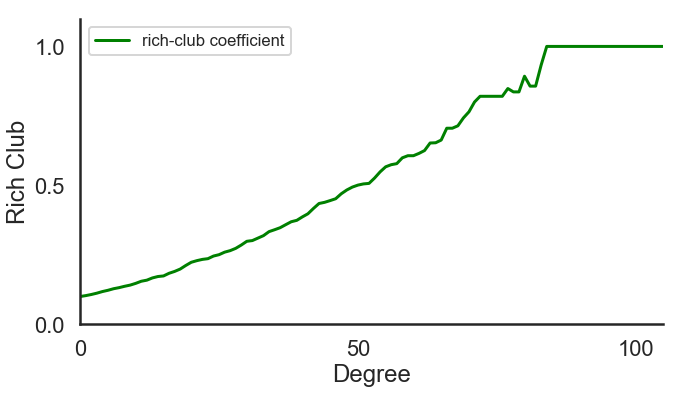

In [13]:
plot_rich_club(realGraph, color=["green"])

---------------------------------------------------------

## *plot_network_measures* 
- to plot network measures values along with the random network values values created from a random network

In [6]:
# input - *network_measures* is calculated by calling *calculate_global_measures*

from scona.graph_measures import calculate_global_measures
from scona.graph_measures import calc_nodal_partition

In [7]:
# in order to have "modularity" in measures one should calculate nodal partition and pass as an argument
nodal_partition, module_partition = calc_nodal_partition(H)

# calculate network_measures
network_measures = calculate_global_measures(H, nodal_partition)

In [8]:
network_measures

{'assortativity': 0.09076922258276784,
 'average_clustering': 0.4498887255891581,
 'average_shortest_path_length': 2.376242649858285,
 'efficiency': 0.47983958611582617,
 'modularity': 0.3828553111606414}

In [9]:
# create random Graph --> create random network_measures

# create a random graph
from scona.make_graphs import random_graph

RandGraph = random_graph(H)

nodal_partition_rand, module_partition_rand = calc_nodal_partition(RandGraph)

# create random network measures
random_network_measures = calculate_global_measures(RandGraph, nodal_partition_rand)

In [10]:
random_network_measures

{'assortativity': -0.0794982998563659,
 'average_clustering': 0.2236149524850416,
 'average_shortest_path_length': 2.09186090782182,
 'efficiency': 0.5182554958614368,
 'modularity': 0.13093274559022677}

In [11]:
# import the function to plot network measures values

from scona.visualisations import plot_network_measures

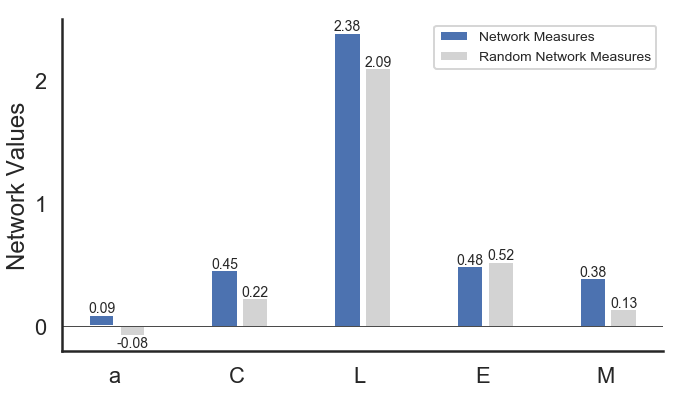

In [12]:
plot_network_measures(network_measures, random_network_measures, figure_name="Network Measures")

----------------------

## *plot_degree_dist*
- to plot the degree distribution along with the degree distribution of an Erdos Renyi random graph that has the same number of nodes

In [9]:
# import the function to plot the degree distribution

from scona.visualisations import plot_degree_dist

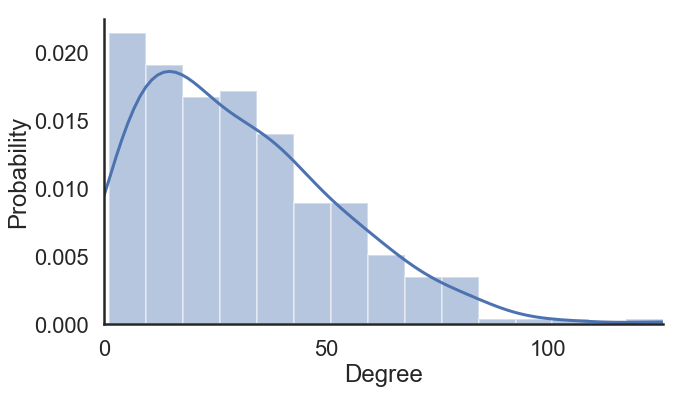

In [14]:
plot_degree_dist(H, binomial_graph=False, figure_name="Degree Distribution")

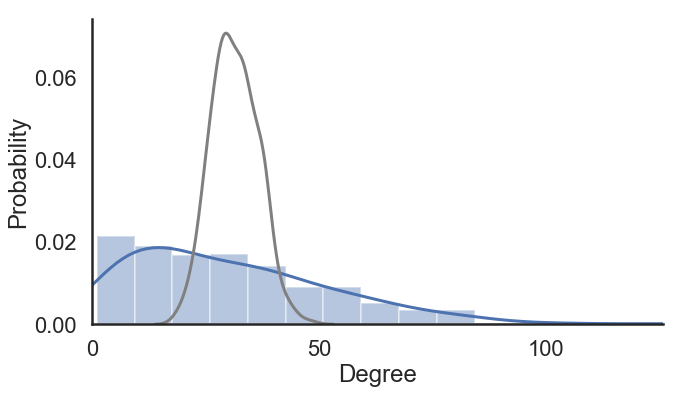

In [10]:
plot_degree_dist(H, binomial_graph=True, figure_name="Degree Distribution")